In [2]:
# ABSTRACT : 
# In this project, you will analyze and segment the customers of an e-commerce company by using the RFM approach. 
# This will enable the e-commerce company to optimize their retention and acquisition strategies. 

# Market Outlook: 
# E-commerce stores which became success stories were successful in targeting the desired customers. 
# One of the techniques by which they were able to achieve this was customer segmentation i.e. 
# by segmenting the existing customers based on frequency of purchases, monetary value etc. 
# E-commerce stores who designed market strategies based on mass marketing soon realized the need of customer segmentation 
# as an alternative to save cost and efforts in the digital sphere. In a real-world segmentation scenario, 
# there might be hundreds of variables which can be used but broadly they segment the customers by the following characteristics:

In [3]:
# Geographic - Segments based on country, state, and city. 
# Demographic - Segments based on gender, age, income, education level, etc. 
# Psychographic - Segments based on geography, lifestyle, age and religious beliefs, etc. 
# Behavior - Segments based on consumer personality traits, attitudes, interests, and lifestyles.
# Overview of the problem : You have been provided with a single file which contains data related to the ecommerce transactions. 
# This data contains the date-time of sale, customer shipping location, and price of single unit from 2016 to 2017.
# Data and Problem Detail : Your organization has asked you to draw meaningful insights from 2 years of data 
# & provide brief details based on the monetary value, frequency of buy, etc. 
# Objective : Build an unsupervised learning model which can enable your company to analyze their customers 
# via RFM (Recency, Frequency and Monetary value) approach.

In [4]:
# Steps to be followed: 
# Understand the problem and objectives 
# 2. Understand the data & develop some business sense 
# 3. EDA (if you require in this case) 
# 4. Provide the results and understanding you got by performing exploratory data analysis. 
# 5. Data Cleaning 
# 6. Model building (trying various techniques and at the end justify why you choose a technique over the others) 
# 7. Testing and cross validation 
# 8. Recommend top 5 combination of partners-managers. 
# 9. For every false prediction calculate the loss which the company will face. 
# 10. Find the results, recommendation and visualizations. 
# 11. Bonus: Any other insight or recommendation that you can give from the data which will help the business(optional) 
# 12. Preparing the deck

In [5]:
# The final solution should be in the form of a deck showing all the steps above. It will be judged on the following criteria: 
# How well you have adhered to the modeling process discipline. 
# Do your results make business sense, how have you used business intuition to take decision during the modeling exercise, including but not limited to the following? 
# Deciding Segmentation (in case you choose it)  
# EDA and Feature engineering  
# Variable and Model selection 
# Performance of your model

### Importing all python libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### Reading the excel file

In [7]:
ecom = pd.read_excel('F:\Learnbay_Data science\Projects\Projects 2022\E-Commerce by Sundaram-20220723T140925Z-001\E-Commerce by Sundaram\E-com_Data.xlsx')

In [8]:
ecom.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


### Getting the shape of the dataset

In [9]:
ecom.shape

(537979, 12)

### Getting the data types, null values and number of rows and columns

In [10]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


### Calculating the total number of null values along each column

In [11]:
ecom.isnull().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

### Calculating the percentage of null values in each column

#### Thresold value to go ahead without dropping the column is 30% of null values

In [12]:
ecom.isnull().sum()/len(ecom)*100

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

### Extract the dataset excluding the last 3 columns

In [13]:
ecom = ecom.iloc[:,0:9]

In [14]:
ecom.head(10)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1


### Remove all the null values under the section Customer ID

In [15]:
ecom = ecom.dropna(subset = ['CustomerID'])

In [16]:
ecom.isnull().sum()/len(ecom)*100

CustomerID           0.0
Item Code            0.0
InvoieNo             0.0
Date of purchase     0.0
Quantity             0.0
Time                 0.0
price per Unit       0.0
Price                0.0
Shipping Location    0.0
dtype: float64

In [17]:
ecom.shape

(404189, 9)

### Identify any kind of duplicate data

In [18]:
ecom.loc[ecom.duplicated(),:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36


### Drop the duplicate data from the dataset

In [19]:
ecom = ecom.drop_duplicates()

In [20]:
ecom.loc[ecom.duplicated(),:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location


In [21]:
ecom.head(10)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1


In [22]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537949
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoieNo           404181 non-null  int64         
 3   Date of purchase   404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 30.8+ MB


In [23]:
# Objective : Build an unsupervised learning model which can enable your 
# company to analyze their customers via RFM (Recency, Frequency and Monetary value) approach.

# Recency = Latest Date - Last invoice data
# latest date = today's date or one day after last invoice date

# Frequency = number of the transaction done by customer

# Monetary = Sum of total amount purchased by customer

### Get first date of purchase and last date of purchase

In [24]:
last_date = max(ecom['Date of purchase'])
first_date = min(ecom['Date of purchase'])

In [25]:
last_date

Timestamp('2017-12-19 00:00:00')

### Initialize latest date as a day after the last date of purchase

In [26]:
import datetime as dt
latest_date = dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

### Create a column for calculating days before which the transaction was made

In [27]:
ecom['Days'] = (latest_date-ecom['Date of purchase']).dt.days

In [28]:
ecom.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Days
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,52
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,76
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,69
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,120
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,71


### Create 3 new variables by grouping the customers on the basis of recency, frequency and monetory

In [29]:
recency = ecom.groupby(['CustomerID']).agg({'Days':'min'})
monetory = ecom.groupby(['CustomerID']).agg({'Price':'sum'})
frequency = ecom.groupby(['CustomerID']).agg({'InvoieNo':'count'})

In [30]:
from functools import reduce
df = [recency,frequency,monetory]
rfm = reduce(lambda  left,right: pd.merge(left,right,on=['CustomerID'],how='outer'), df)

In [31]:
rfm = rfm.reset_index()

In [32]:
rfm

,CustomerID,Days,InvoieNo,Price
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


### Renaming the column names as required

In [33]:
rfm.rename(columns = {'Days':'Recency','InvoieNo':'Frequency','Price':'Monetory'}, inplace=True)

In [34]:
rfm

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


### Defining the quantile sections

In [35]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [36]:
quantiles

{'CustomerID': {0.25: 1095.0, 0.5: 2186.0, 0.75: 3279.0},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

### Creating two functions to determine ratings of the three parameters

In [37]:
def Rscore(x,p,d):
    if x<= d[p][0.25]:
        return 1
    elif x<= d[p][0.5]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMscore(x,p,d):
    if x<= d[p][0.25]:
        return 4
    elif x<= d[p][0.5]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

### Applying the above functions with the required parameters

In [38]:
rfm['R'] = rfm['Recency'].apply(Rscore, args = ('Recency', quantiles))
rfm['F'] = rfm['Frequency'].apply(FMscore, args = ('Frequency', quantiles))
rfm['M'] = rfm['Monetory'].apply(FMscore, args = ('Monetory', quantiles))

In [39]:
rfm

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,9,13,24962.0,1,4,4
4347,4371.0,4,754,280608.0,1,1,1


### Grouping the all together rating to form a code for each customer

In [40]:
rfm['RFMgroup'] = rfm.R.map(str)+rfm.F.map(str)+rfm.M.map(str)

In [41]:
rfm

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMgroup
0,2.0,4,182,553704.0,1,1,1,111
1,3.0,77,27,257404.0,3,3,1,331
2,4.0,19,72,176613.0,2,2,2,222
3,5.0,311,16,41976.0,4,4,3,443
4,6.0,37,84,151822.0,2,2,2,222
...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,444
4345,4369.0,181,7,10774.0,4,4,4,444
4346,4370.0,9,13,24962.0,1,4,4,144
4347,4371.0,4,754,280608.0,1,1,1,111


### Observing one of the groups to see if the coding matches the RFM criteria

In [42]:
rfm[rfm['RFMgroup']=='111'].sort_values('Monetory', ascending = False)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMgroup
1694,1704.0,3,2053,35536194.0,1,1,1,111
1886,1896.0,2,5874,17743855.0,1,1,1,111
1337,1346.0,10,1395,12647317.0,1,1,1,111
3780,3802.0,3,1060,12319439.0,1,1,1,111
4211,4234.0,3,322,10654918.0,1,1,1,111
...,...,...,...,...,...,...,...,...
2368,2381.0,15,114,209842.0,1,1,1,111
141,145.0,2,106,207780.0,1,1,1,111
1738,1748.0,15,414,207627.0,1,1,1,111
1655,1665.0,16,197,206573.0,1,1,1,111


In [43]:
new_rfm = rfm[['Recency','Frequency','Monetory']]

In [44]:
new_rfm.head()

,Recency,Frequency,Monetory
0,4,182,553704.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


### Feature Scaling - if dataset has outliers than go for Standard scaler and if it is normally distributed, then go
### for Min-Max scaler

F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monetory'>

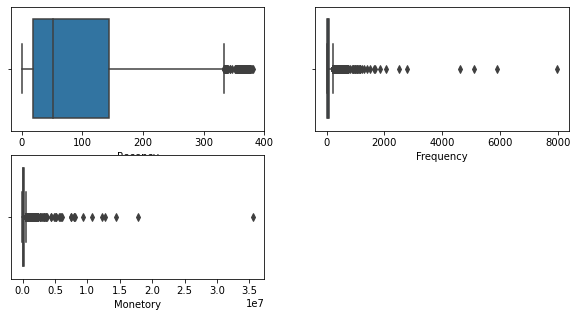

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(new_rfm['Recency'])
plt.subplot(2,2,2)
sns.boxplot(new_rfm['Frequency'])
plt.subplot(2,2,3)
sns.boxplot(new_rfm['Monetory'])

### Since all the parameters have outliers we go by Standard scaling

In [46]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [47]:
scaled_rfm = pd.DataFrame(std.fit_transform(new_rfm), columns=new_rfm.columns)

In [48]:
scaled_rfm

,Recency,Frequency,Monetory
0,-0.886877,0.383795,0.377719
1,-0.161877,-0.284135,0.032043
2,-0.737904,-0.090220,-0.062211
3,2.162093,-0.331537,-0.219285
4,-0.559137,-0.038510,-0.091133
...,...,...,...
4344,1.834354,-0.357392,-0.244363
4345,0.870999,-0.370320,-0.255686
4346,-0.837219,-0.344465,-0.239134
4347,-0.886877,2.848672,0.059114


### Building of Clustering model

In [49]:
from sklearn.cluster import KMeans

In [50]:
sum_sq_dist = []
for k in range(1,15):
    kmeans = KMeans( n_clusters=k, init='k-means++', max_iter=300, n_jobs=-1)
    kmeans.fit(scaled_rfm)
    sum_sq_dist.append(kmeans.inertia_)

F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarnin

### Plotting of sum of square distances to determine K value by elbow method

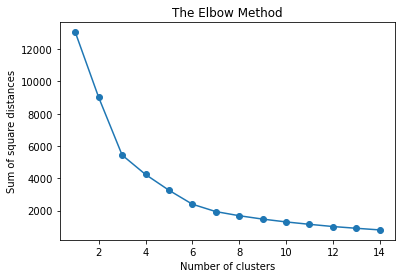

In [51]:
plt.plot(range(1,15), sum_sq_dist,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square distances')
plt.show()

#### We consider K value as  4 for our own reference and suitability

### Fitting the model with K=4 number of clusters from the elbow method

In [112]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_jobs=-1)

In [113]:
y_kmeans = kmeans.fit_predict(scaled_rfm)

F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [114]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

### Loading the new cluster labels to the corresponidng dataset

In [115]:
new_rfm['Cluster label'] = kmeans.labels_
rfm['Cluster label'] = kmeans.labels_

<ipython-input-115-021a8826afe0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rfm['Cluster label'] = kmeans.labels_


In [116]:
new_rfm

,Recency,Frequency,Monetory,Cluster label
0,4,182,553704.0,0
1,77,27,257404.0,0
2,19,72,176613.0,0
3,311,16,41976.0,1
4,37,84,151822.0,0
...,...,...,...,...
4344,278,10,20480.0,1
4345,181,7,10774.0,1
4346,9,13,24962.0,0
4347,4,754,280608.0,0


In [117]:
rfm

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMgroup,Cluster label
0,2.0,4,182,553704.0,1,1,1,111,0
1,3.0,77,27,257404.0,3,3,1,331,0
2,4.0,19,72,176613.0,2,2,2,222,0
3,5.0,311,16,41976.0,4,4,3,443,1
4,6.0,37,84,151822.0,2,2,2,222,0
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,444,1
4345,4369.0,181,7,10774.0,4,4,4,444,1
4346,4370.0,9,13,24962.0,1,4,4,144,0
4347,4371.0,4,754,280608.0,1,1,1,111,0


### Determining the centroid of all the clusters to see the trend and the number of buyers in that cluster

In [118]:
centroid = rfm.groupby(by='Cluster label').agg({'Recency':'mean','Frequency':'mean','Monetory':'mean','CustomerID':'nunique'})
centroid = centroid.rename(columns = {'CustomerID':'NumberofBuyers'})
centroid['Percent'] = round(centroid['NumberofBuyers']/centroid.NumberofBuyers.sum()*100,2)

In [119]:
centroid

,Recency,Frequency,Monetory,NumberofBuyers,Percent
Cluster label,,,,,
0,41.416178,104.125965,2.375754e+05,3239,74.48
1,247.969863,28.026484,5.777182e+04,1095,25.18
2,2.500000,5889.500000,8.363220e+06,4,0.09
3,6.818182,1151.818182,1.216187e+07,11,0.25


### Calculating the metrics score to see if K=4 is optimal and perfect for the given dataset

In [122]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [140]:
sil_score = {}
ch_score = {}
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_jobs=-1)
    y_kmeans = kmeans.fit_predict(scaled_rfm)
    sil = silhouette_score(scaled_rfm, y_kmeans)
    chs = calinski_harabasz_score(scaled_rfm,y_kmeans)
    sil_score.update({i:sil})
    ch_score.update({i:chs})

F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
F:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarnin

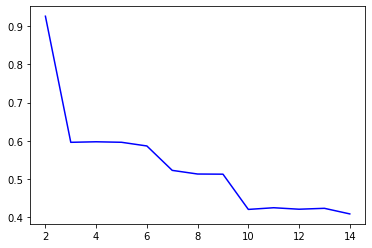

In [145]:
plt.plot(sil_score.keys(), sil_score.values(), 'b-', )

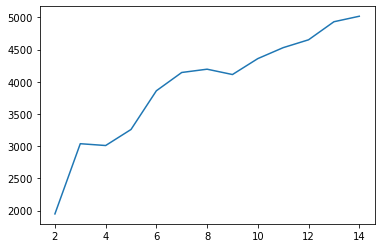

In [143]:
plt.plot(ch_score.keys(), ch_score.values())

### Copying the final labelled data into a new excel file

In [147]:
rfm.to_excel('Final cluster labelling.xlsx')

### Saving the model to go ahead with the data on future purposes

In [148]:
import joblib
filename = 'Final cluster labelling.sav'
joblib.dump(rfm, filename)

['Final cluster labelling.sav']